# How to find $\pi$ with Python

This notebook gives an example of how mathematical questions can be answered by a few lines of code.
Here, we want to get an estimate of the irrational number $\pi$ by making a computer throw a darts. If you throw darts on something that looks like the figure above, the probability of landing inside the circle is $\frac{\pi}{4}$. So, if you thow a lot of darts, the fraction of darts inside the circle as compared to the total number of darts inside the square is going to be roughly $\frac{\pi}{4}$. We can find $\pi$ by throwing darts then! 

But a human can only throw a few darts. But a computer could throw a lot more. That is what we do in this notebook. This is actually an example of a Monte Carlo method, which are methods that utilise randomness and numerical computation (finding results by making a computer do math).

Here are some resources you might be interested in:

* [Installing Python](https://docs.python-guide.org/starting/installation/)
* [Monte Carlo methods](https://en.wikipedia.org/wiki/Monte_Carlo_method)
* [Udacity is a great site to learn Python and it's free](https://www.udacity.com/)
* [A cool course about differential equations using Python](https://www.udacity.com/course/differential-equations-in-action--cs222)

Before doing most things in Python, you usually need to import a few libraries. These libraries have special commands (functions) that let us do interesting things. Here, I am importing the plotting library Matplotlib and the numerical python library Numpy

In [57]:
import matplotlib.pyplot as plt
import numpy as np

What we want to do is throw darts at a circle. So, we need to create the circle. If a point (x,y) lies on the circle of radius r, it has to obey

$x^2+y^2=r^2$


You can also write x as $r\cos\theta$ and y as $r\sin\theta$ where $\theta$ is the angle at which (x,y) is located. So, to draw a circle, we need a lot of points on that circle. To get these points, I am going to select a lot of angles (𝜃 values) between 0 and 2𝜋. That will give a lot of points (x,y)


In [58]:
theta = np.linspace(0,2*np.pi,100)
x = np.cos(theta)
y = np.sin(theta)

x is a list of x coordinates. 

In [59]:
x

array([ 1.        ,  0.99798668,  0.99195481,  0.9819287 ,  0.9679487 ,
        0.95007112,  0.92836793,  0.90292654,  0.87384938,  0.84125353,
        0.80527026,  0.76604444,  0.72373404,  0.67850941,  0.63055267,
        0.58005691,  0.52722547,  0.47227107,  0.41541501,  0.35688622,
        0.29692038,  0.23575894,  0.17364818,  0.1108382 ,  0.04758192,
       -0.01586596, -0.07924996, -0.14231484, -0.20480667, -0.26647381,
       -0.32706796, -0.38634513, -0.44406661, -0.5       , -0.55392006,
       -0.60560969, -0.65486073, -0.70147489, -0.74526445, -0.78605309,
       -0.82367658, -0.85798341, -0.88883545, -0.91610846, -0.93969262,
       -0.95949297, -0.97542979, -0.98743889, -0.99547192, -0.99949654,
       -0.99949654, -0.99547192, -0.98743889, -0.97542979, -0.95949297,
       -0.93969262, -0.91610846, -0.88883545, -0.85798341, -0.82367658,
       -0.78605309, -0.74526445, -0.70147489, -0.65486073, -0.60560969,
       -0.55392006, -0.5       , -0.44406661, -0.38634513, -0.32

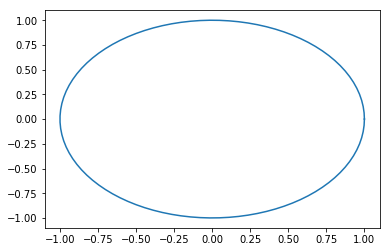

In [60]:
plt.plot(x,y)

Now, we need to draw the square. i.e, we need to draw four lines
The following code draws a red line from (-1,1) to (-1, -1).

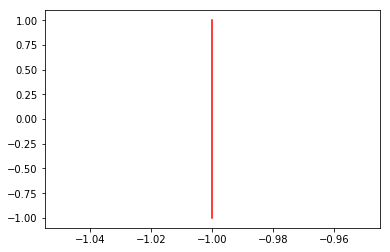

In [61]:
plt.plot([-1,-1],[1,-1],'r')

Everything together now

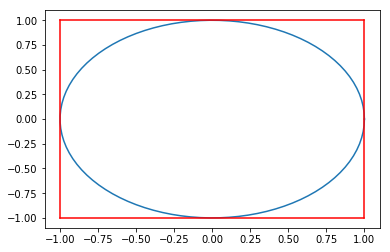

In [62]:
plt.plot(x,y)
plt.plot([-1,-1],[1,-1],'r')
plt.plot([1,1],[1,-1],'r')
plt.plot([-1,1],[-1,-1],'r')
plt.plot([1,-1],[1,1],'r')

Now, to throw a dart. We do this by making Python randomly choose a point (x,y). We do this by randomly choosing a point between -1 and 1 and setting it to be x and doing the same for y.

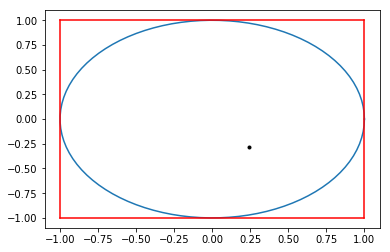

In [63]:
plt.plot(x,y)
plt.plot([-1,-1],[1,-1],'r')
plt.plot([1,1],[1,-1],'r')
plt.plot([-1,1],[-1,-1],'r')
plt.plot([1,-1],[1,1],'r')
a = np.random.uniform(-1,1,1)
b = np.random.uniform(-1,1,1)
plt.plot(a,b,'k.')

Try running the previous cell a few times. It'll be a different point each time. (Because it's random)

How do check if this random point is inside the circle ? Well, if a point (x,y) is inside the circle of radius r, then $x^2+y^2<r^2$. Let's check if the random point is inside.

In [25]:
if a**2+b**2 <=1:
        print("It's inside")

It's inside


We know how to throw one dart. But we need to throw many and count how many are inside the circle. To throw many, we use lists which is a Python structure for storing many values. We usually start with an empty list. Fox example,

In [47]:
list =[]
print(list)

[]


In [50]:
list = list + [1]
print(list)

[1, 1, 1]


So, we start with two empty lists for values of a and b respectively.

In [52]:
avec =[]
bvec =[]

We set ntotal to be the number of darts we want to throw. We also define ninside to be the number of darts inside the circle. It is set to 0 in the beginning but everytime a dart falls inside the circle, we'll increase it by 1.

In [53]:
ntotal =1000
ninside =0

We use a 'for' loop to get new values of a and b and add them to avec and bvec. We also check if (a,b) lies in the circle and increase ninside by 1 if so.

In [54]:
for i in range(ntotal):
    a = np.random.uniform(-1,1,1)
    b = np.random.uniform(-1,1,1)
    if a**2+b**2 <=1:
        ninside = ninside +1
    avec = avec +[a]
    bvec = bvec +[b]

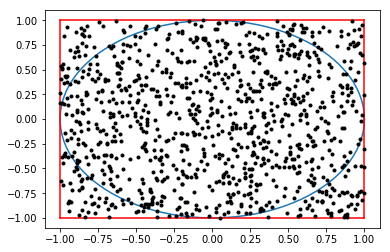

In [64]:
plt.plot(x,y)
plt.plot([-1,-1],[1,-1],'r')
plt.plot([1,1],[1,-1],'r')
plt.plot([-1,1],[-1,-1],'r')
plt.plot([1,-1],[1,1],'r')
plt.plot(avec,bvec,'k.')

Lastly, we multiplty the fraction of darts inside by 4 to get our estimate of pi.

In [65]:
print(4*ninside/ntotal)

3.184


 This estimate improves if you throw more darts. Try changing ntotal and running the cells again.